# Procesamiento de Lenguaje Natural - **Análisis Semántico, Discurso y Pragmática**

Esta notebook presenta ejemplos de los diferentes aspectos relacionados con el análisis semántico, discurso y pragmática.


En caso de que los ejemplos lo requieran, los ejecutaremos tomando como base un párrafo de la página de Wikipedia referida a Londres.

In [ ]:
text = "London is the capital and largest city of England and of the United Kingdom. \
        Standing on the River Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to the North Sea, \
            London has been a major settlement for two millennia.\
        Londinium was founded by the Romans. \
        The City of London, London's ancient core − an area of just 1.12 square miles (2.9 km2) and colloquially known as the Square Mile − retains boundaries that closely follow its medieval limits. \
        The City of Westminster is also an Inner London borough holding city status. Greater London is governed by the Mayor of London and the London Assembly. \
        London is considered to be one of the world's most important global cities and has been termed the world's most powerful, most desirable, most influential, most visited, most expensive, innovative, sustainable, most investment friendly, and most popular for work city. \
        London exerts a considerable impact upon the arts, commerce, education, entertainment, fashion, finance, healthcare, media, professional services, research and development, tourism and transportation. London ranks 26th out of 300 major cities for economic performance. It is one of the largest financial centres and has either the fifth or the sixth largest metropolitan area GDP. \
        It is the most-visited city as measured by international arrivals and has the busiest city airport system as measured by passenger traffic. \
        It is the leading investment destination, hosting more international retailers and ultra high-net-worth individuals than any other city. \
        London's universities form the largest concentration of higher education institutes in Europe, and London is home to highly ranked institutions such as Imperial College London in natural and applied sciences, the London School of Economics in social sciences, and the comprehensive University College London and King's College London. \
        In 2012, London became the first city to have hosted three modern Summer Olympic Games."

text_list = ["London is the capital and largest city of England and of the United Kingdom.",
             "Standing on the River Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to the North Sea, London has been a major settlement for two millennia",
            "Londinium was founded by the Romans.",
        "The City of London, London's ancient core − an area of just 1.12 square miles (2.9 km2) and colloquially known as the Square Mile − retains boundaries that closely follow its medieval limits.",
        "The City of Westminster is also an Inner London borough holding city status. Greater London is governed by the Mayor of London and the London Assembly.",
        "London is considered to be one of the world's most important global cities and has been termed the world's most powerful, most desirable, most influential, most visited, most expensive, innovative, sustainable, most investment friendly, and most popular for work city.",
        "London exerts a considerable impact upon the arts, commerce, education, entertainment, fashion, finance, healthcare, media, professional services, research and development, tourism and transportation. London ranks 26th out of 300 major cities for economic performance. It is one of the largest financial centres and has either the fifth or the sixth largest metropolitan area GDP.",
        "It is the most-visited city as measured by international arrivals and has the busiest city airport system as measured by passenger traffic.",
        "It is the leading investment destination, hosting more international retailers and ultra high-net-worth individuals than any other city.",
        "London's universities form the largest concentration of higher education institutes in Europe, and London is home to highly ranked institutions such as Imperial College London in natural and applied sciences, the London School of Economics in social sciences, and the comprehensive University College London and King's College London.",
        "In 2012, London became the first city to have hosted three modern Summer Olympic Games."]

text_short = "London is the capital and largest city of England and of the United Kingdom. \
              Standing on the River Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to the North Sea, \
                  London has been a major settlement for two millennia. "


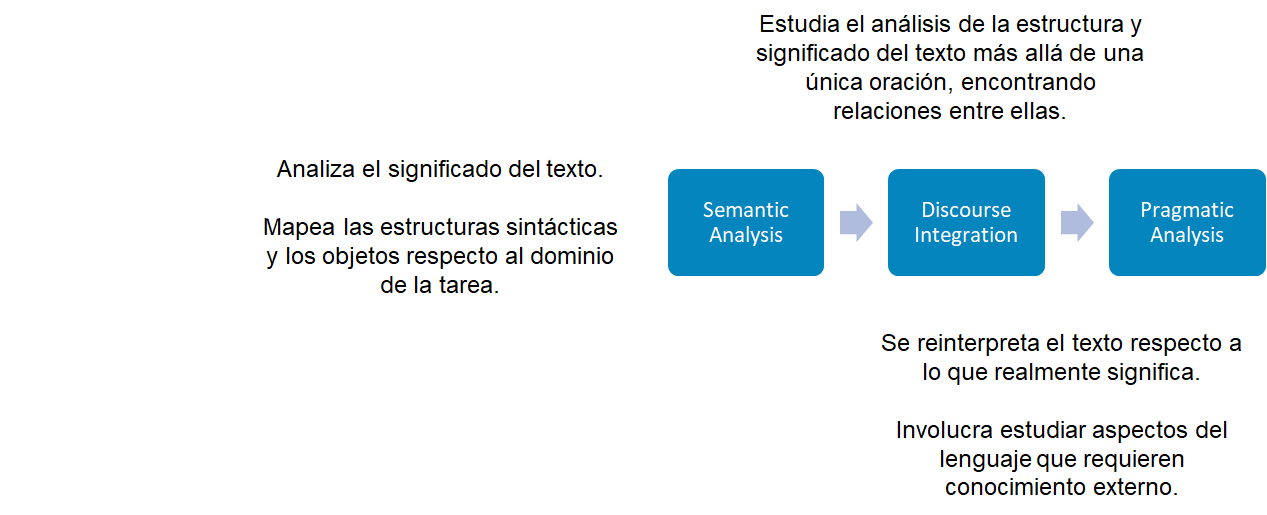

## Análisis Semántico

La semántica describe el proceso de comprender el lenguaje natural. Se ocupa de la determinación de lo que realmente significa una oración al relacionar características sintácticas y desambiguar palabras con múltiples definiciones para el contexto dado.
El significado de las palabras y cómo se combinan para formar el significado de las oraciones.

* Este nivel implica la interpretación apropiada del significado de las oraciones, en lugar del análisis a nivel de palabras o frases individuales.
  * La estructura y el contexto ayudan en la compresión.
  * La estructura básica es la acepción (sense).

* Permite analizar texto en un nivel conceptual opuesto a términos simples. 
  * Por ejemplo, durante el proceso de consulta y coincidencia de documentos para la recuperación de información.

* Permite enriquecer textos con el uso de fuentes léxicas.




### Semántica Léxica

Semántica léxica se refiere al análisis del significado de cada una de los items léxicos.
* Palabras.
* Sub-palabras.
* Afijos.
* Palabras compuestas.
* Frases.

* Se trata de la relación entre los items léxico, el siginificado de las oraciones y su sintaxis.
* Cada ítem léxico tiene su propia sintaxis, forma y significado. 
* También obtienen significado a partir de las ítems léxicos que los rodean: context, posición

Relaciones entre los ítems léxicos. 


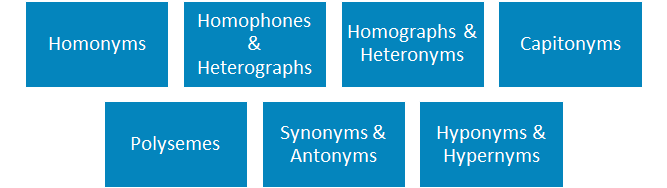

In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
from nltk.corpus import wordnet

syn = wordnet.synsets('bank','n') # syn = wordnet.synsets('talk','v')

for s in syn:
  print("\nSynset name :", s.name()) 
  print("Abstract term :", s.hypernyms()) 
  print("Specific term :", s.hyponyms()) 
  print("Member meronyms :", s.member_meronyms()) 
  print("Root hypernerm :", s.root_hypernyms())
  print("Lemmas :",s.lemmas())
  for l in s.lemmas():
   if len(l.antonyms()) > 0:
      print(" --",l,l.antonyms())

### Word Sense Disambiguation

Las palabras suelen tener más un significado posible.


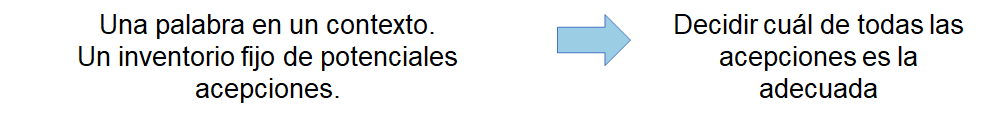

#### NLTK

NLTK se basa en el método de Lesk que mide la superposición entre definiciones de sentido para todas las palabras en contexto.

* Una palabra a la vez.	
* Contexto == conjunto de palabras en una oración o párrafo circundante.

Para "mejores" resultados requiere que se le pase el tag de part-of-speech. 


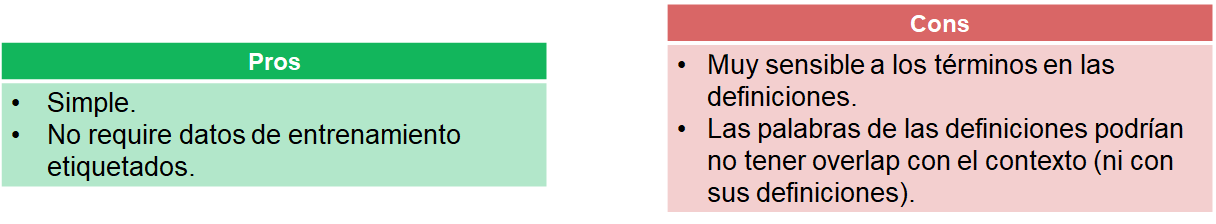

In [ ]:
from nltk.wsd import lesk

sent = ["I went to the bank to deposit money"]

print(lesk(sent, 'bank', 'n'))
print(lesk(sent, 'bank','v'))
print(lesk(sent, 'bank'))

In [ ]:
from nltk.corpus import wordnet as wn
for ss in wn.synsets('bank'):
    print(ss, ss.definition())

#### [sense2vec](https://github.com/explosion/sense2vec)

* Se basa en word2vec.
* Trata de agregar contextualidad a los embeddings de las palabras, basadas en su desambiguación.
* En lugar de predecir un token dado el contexto, el objetivo es predecir el uso correcto dado el contexto.

* Requiere de corpus etiquetados.
  * Cuenta la cantidad de usos de una palabra, donde cada uso es presentado por una etiqueta.
  * Genera un embedding random para cada uno de los usos.
  * Entrena el modelo usando la arquitectura de word2vec.


In [ ]:
pip install sense2vec

Para poder usarlo, hay que bajar los modelos pre-entrenados. Hay varias opciones, acá vamos a utilizar los más pequeños (aprox 500 mb).

In [ ]:
from tqdm.notebook import tqdm
import io
import os
import requests 
import sys

def descargar_archivo(url,datapath): # como vamos a bajar varios archivos, armamos un método
  if os.path.exists(datapath): # antes de descargar el archivo controlamos que no exista
    print('File already exists')
    return 
    
  print("File does not exist")
    
  req = requests.get(url, stream=True)
  file_size = int(req.headers['Content-Length'])
  chunk_size = 1024  # 1 MB
  num_bars = int(file_size / chunk_size)

  with open(datapath, 'wb') as fp:
    for chunk in tqdm(req.iter_content(chunk_size=chunk_size), total=num_bars, unit='KB', desc=datapath, leave=True, file=sys.stdout):
      fp.write(chunk)

In [ ]:
descargar_archivo('https://github.com/explosion/sense2vec/releases/download/v1.0.0/s2v_reddit_2015_md.tar.gz','s2v_reddit_2015_md.tar.gz')

In [ ]:
import tarfile

tar = tarfile.open("s2v_reddit_2015_md.tar.gz", "r:gz")
tar.extractall()
tar.close()

In [ ]:
from sense2vec import Sense2Vec

s2v = Sense2Vec().from_disk("s2v_old")

In [ ]:
query = "natural_language_processing|NOUN" # importante respetar la sintaxis que espera los espacios son guiones bajos y hay que pasarle el POS

vector = s2v[query]
print(vector)

In [ ]:
print(s2v.get_other_senses(query))

In [ ]:
most_similar = s2v.most_similar(query, n=10)
print(most_similar)

#### spaCy

No viene por defecto en spaCy, pero se puede agregar el componente de ``sense2vec`` al pipeline.

*Nota*. Pueden aparecer problemas con las versiones de spaCy y sense2vec. Hay una dependencia de la que requieren versiones distintas y al instalar una biblioteca después de la otra, la segunda sobre-escribe la dependencia de la primera. Reinstalar últimas versiones de ambas y debería solucionarse el problema. 

*Nota 2*. Si se quiere ejecutar de nuevo la celda donde se crea ``nlp_disam`` dará error de que ``Extension '_s2v' already exists on Doc.``. Para solucionarlo, reiniciar el Runtime y ejecutar nuevamente las celdas.

In [ ]:
import spacy 
from sense2vec import Sense2VecComponent

In [ ]:
spacy.cli.download('en_core_web_sm')

*Nota*. Si alguna de las celdas siguientes da error de que el ``doc`` ya tiene las extensiones o algo parecido. Reiniciar el runtime y volver a ejecutar.

In [ ]:
nlp = spacy.load('en_core_web_sm') 
# s2v = Sense2VecComponent(nlp_disam.vocab).from_disk('s2v_old') # si no se setea el vocabulario da error luego al querer acceder a los elementos, esto es para otra versión de spacy
nlp_disam = nlp.add_pipe("sense2vec")
nlp_disam.from_disk('s2v_old')
nlp_disam.vocab = nlp.vocab

In [ ]:
doc = nlp("A sentence about natural language processing.") 

In [ ]:
for ent in doc:
    print("\n",nlp_disam.s2v_key(ent))
    print(ent._.s2v_freq)
    print(ent._.s2v_most_similar(3))

No solamente podemos obtener la información de las palabras individuales, sino que cambién lo podemos hacer por grupos de palabas.

In [ ]:
print(doc[3:6])
print(nlp_disam.s2v_key(doc[3:6]))
print(doc[3:6]._.s2v_freq)
print(doc[3:6]._.s2v_vec)
print(doc[3:6]._.s2v_most_similar(5))

#### [pywsd](https://github.com/alvations/pywsd)

Un paquete que integra diferentes alternativas clásicas de desambiguación.


In [ ]:
pip install -U pywsd

*Nota*. Reiniciar el runtime después de la instalación. Puede suceder que haya conflicto con la versión de ``wn`` que se tenga instalada. En ese caso, ejecutar la siguiente celda.

In [ ]:
pip install -U wn==0.0.22

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

In [ ]:
from pywsd.lesk import simple_lesk

sent = 'I went to the bank to deposit my money'
ambiguous = 'bank' 
answer = simple_lesk(sent, ambiguous, pos='n') # acá estamos seteando una única palabra a desambiguar

print(answer)
print(answer.definition())

Si queremos desambiguar todas las palabras en la oración, podemos hacer:

In [ ]:
from pywsd import disambiguate
from pywsd.similarity import max_similarity as maxsim # está basada en las métricas de semejanza semántica que ya vimos.

disambiguation = disambiguate('I went to the bank to deposit my money')
for d in disambiguation:
  print(d)
  if d[1] is not None:
    print("  ",d[1].definition())

### Named Entity Recognition: Reconocimiento, Identificación o Extracción de Entidades

* Primer paso para la extracción de información. 
* Busca identificar y clasificar elementos en el texto en categorías predefinidas como los nombres de:
  * Personas.
  * Organizaciones.
  * Lugares.
  * Expresiones temporales.
  * Cantidades.
  * Valores monetarios, porcentajes.

* NER puede dar respuesta a preguntas cómo:
  * Qué compañías fueron mencionadas en el artículo?
  * Qué productos estaban mencionados en la review?
  * Nombra a alguien el tweet? Incluye la ubicación de alguien?



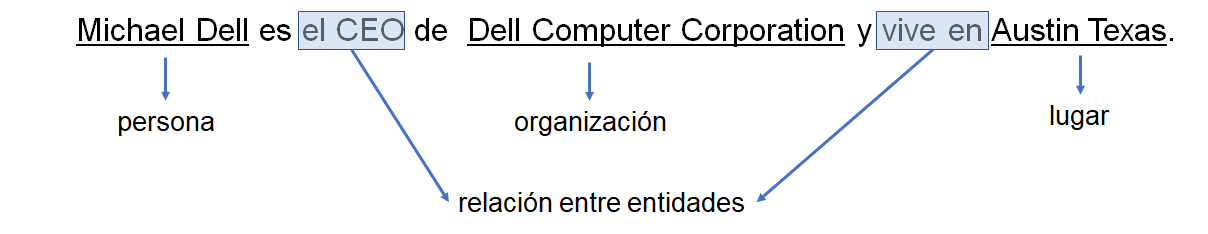

#### NLTK

Como ya vimos en la notebook de Análisis Sintáctico, NLTK incorpora la detección de entidades en el shallow parser.

In [ ]:
import nltk
nltk.download('punkt') # tokenizer
nltk.download('averaged_perceptron_tagger') # POS tagger
nltk.download('maxent_ne_chunker') # shallow parsing
nltk.download('words') # lista de palabras, utilizada en spell checker

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

ne_tree = ne_chunk(pos_tag(word_tokenize(text_short)))

print(ne_tree)

#### spaCy

Está entrenado con otro corpus distinto al de NLTK.

In [ ]:
import spacy 
from collections import Counter

In [ ]:
nlp = spacy.load('en_core_web_sm')
sentence_nlp = nlp(text_short)

# imprimimos todo lo que encontró
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

# juntamos las categorías de las entidades que encontró
labels = [x.label_ for x in sentence_nlp.ents]
print(Counter(labels))


spaCy también nos deja visualizarlas en el contexto de la oración o texto que analizamos.

In [ ]:
from spacy import displacy

displacy.render(sentence_nlp, style='ent', jupyter=True)

#### stanza

Permite acceder de forma directa a las entidades. El componente viene incluido en el pipeline por defecto.

In [ ]:
pip install stanza

In [ ]:
import stanza
stanza.download('en') # la primera vez tenemos que bajar el modelo

In [ ]:
stanza_nlp = stanza.Pipeline(lang='en',processors='tokenize,ner')
stanza_doc = stanza_nlp(text_short)
print(*[f'entity: {ent.text}\ttype: {ent.type}' for ent in stanza_doc.ents], sep='\n')

#### IBM Watson

Como ya vimos, para poder usar esta biblioteca, se necesita tener una cuenta creada en la [plataforma](https://cloud.ibm.com/registration?target=/developer/watson&cm_sp=WatsonPlatform-WatsonServices-_-OnPageNavLink-IBMWatson_SDKs-_-Python) y a su vez crear una aplicación para el servicio que necesitamos para poder obtener las claves de autentificación.
En este caso vamos a necesitar el de "*Natural Language Understanding*".

*Nota*: En el código no vamos a incluir nada de manejo de errores, pero podría ocurrir que en alguna invocación obtengamos algún error de red, recurso no disponible, queries agotadas, ...

In [ ]:
pip install --upgrade ibm-watson

In [ ]:
from ibm_watson.natural_language_understanding_v1 import Features, EntitiesOptions, KeywordsOptions
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
import ibm_watson

In [ ]:
authenticator = IAMAuthenticator('API-KEY')
nlu = ibm_watson.NaturalLanguageUnderstandingV1(version='2018-03-16', authenticator=authenticator)

In [ ]:
nlu.analyze(text=text_short,
            features=Features(entities=EntitiesOptions(), keywords=KeywordsOptions())).get_result()

### Semantic Role Labeling

Un análisis semántico superficial para representar eventos y sus participantes Parecido al shallow parsing, intenta determinar el rol semántico que cumple cada frase nominal que funciona como argumento de un verbo.

* Para qué sirve?
  * Question Answering. 
    * Por ejemplo, permite responder las preguntas “W” (what, where, when, …).
  * Hacer resúmenes y extraer las ideas principales de textos.
  * Hacer representaciones semánticas de los textos en forma de grafos.
  * Comparar traducciones respecto a su contenido y semántica.
  * Puede ayudar en el entrenamiento de chatbots. 


Ni NLTK, spaCy o stanza lo proveen de forma directa. Se puede implementar.

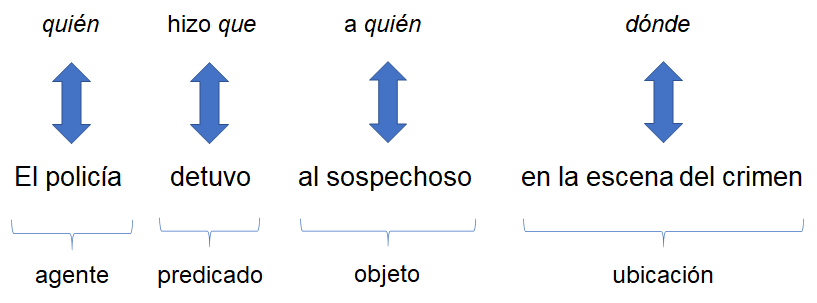

#### AllenNLP

Lo implementa de forma directa basándose en BERT.

También se encuentra disponible el paquete individual [``transformer-srl``](https://pypi.org/project/transformer-srl/) basada en la implementación de AllenNLP.

In [ ]:
pip install -U allennlp

In [ ]:
pip install allennlp-models

*Nota*. Reiniciar el runtime luego de la instalación!

La primera vez hay que bajar los modelos. 
Si no los tenemos bajados, también bajará paquetes de NLTK.

En https://storage.googleapis.com/allennlp-public-models (la raíz del archivo a descargar) van a encontrar la lista completa de modelos que provee Allen.

*Nota*. Controlar que sea de los modelos más nuevos, los anteriores suelen fallar.

In [ ]:
from allennlp.predictors.predictor import Predictor

predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/bert-base-srl-2020.11.19.tar.gz") 

In [ ]:
preds = predictor.predict(sentence = text_list[1])

print (preds.keys())

for v in preds['verbs']:
  print(v)

#### IBM Watson

Cambiando las configuraciones de lo que usamos antes, podemos también obtener los roles semánticos.

*Nota*. Recueden que si ya sabemos que nuestra aplicación va a requerir toda la información disponible, es más eficiente en término de cantidad de consultas pedir todo junto.

In [ ]:
from ibm_watson.natural_language_understanding_v1 import SemanticRolesOptions

nlu.analyze(text=text_short,
            features=Features(semantic_roles=SemanticRolesOptions())).get_result() # la respuesta va a ser un json que podemos procesar

## Discurso & Pragmática

#### Discurso

Trata del análisis de la estructura y el significado del texto más allá de una sola oración, haciendo conexiones entre palabras y oraciones.

* Involucra la resolución de referencias a elementos anteriores o posteriores en el discurso.
  * Por ejemplo, resolución de pronombres.
  * Uno de los problemas más difíciles. Enfoques recientes se basan en deep learning.


#### Pragmática

El nivel pragmático se ocupa del uso del conocimiento del mundo real y de comprender cómo eso impacta en el significado de lo que se está comunicando.
* Cómo se usa el lenguaje para lograr los objetivos.
* La influencia del contexto (puede incluir hora y lugar) en el significado.

Al analizar la dimensión contextual de los textos y consultas, se obtiene una representación más detallada.

* Este nivel involucra principalmente el procesamiento y la comprensión de las consultas de los usuarios integrando el historial y los objetivos del usuario, así como el contexto en el que se realiza la consulta.

* Facilita la conversación entre el sistema IR y los usuarios.
* Permite obtener el propósito sobre el cual se planea utilizar la información que se busca.



#### Resumen de texto

Realizar un resumen de un texto más largo.

Por qué hacer resúmenes automáticos?
* Los resúmenes reducen el tiempo de lectura.
* Los resúmenes facilitan el proceso de selección de textos.
* El resumen automático mejora la efectividad de la indexación.
* Los algoritmos de resumen automático son menos parciales que los humanos.
* Los resúmenes personalizados son útiles en los sistemas de preguntas y respuestas, ya que proporcionan información personalizada.


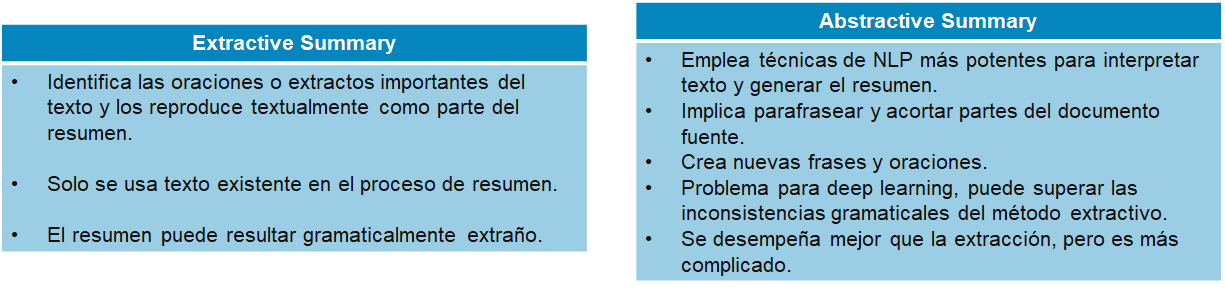

No lo traen las bibliotecas, pero se puede implementar!
Vamos a seguir la siguiente estrategia:

1. Pre-procesar el texto a resumir. En este caso vamos a separar en oraciones y eliminar stopwords.
2. Construir una matriz de semejanza entre las oraciones que componen el texto.
3. Basándonos en la matriz, generar el ranking de oraciones.
4. Elegir las N primeras sentencias para construir el resumen.

Como la técnica funciona considerando como unidad básica las oraciones, el texto a resumir tiene que tener al menos 2 oraciones.

*Nota*. La implementación se basa en NLTK, pero podría basarse en cualquiera de las otras bibliotecas.

In [ ]:
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance

import re
from collections import Counter

import numpy as np
import pandas as pd

import networkx as nx # la misma biblioteca de grafos de word of graphs

Pre-procesamos el texto, en este caso vamos a implementar una función ad-hoc que retorne un mapa de las oraciones originales y las pre-procesadas.

Por qué mantener ambas versiones? Recordemos que el pre-procesamiento puede ser muy agresivo y que para esta tarea por un lado queremos mantener las oraciones originales y por otro encontrar oraciones que sean semánticamente similares. Entonces, nos quedamos con la referencia a la oración original y también con la versión reducida para luego comparar.

*Nota*. Se podría solo mantener la oración original y luego pre-procesar cada oración cuando se quisiera evaluar su semejanza, pero esto implicar re-pre-procesar oraciones tantas veces como comparaciones quiera hacer.

In [ ]:
import nltk
nltk.download('punkt') 
nltk.download('stopwords') 
nltk_stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
import re
import numpy as np
import pandas as pd
from collections import Counter

def pre_processing(text):
  sentences = {}
  default_st = nltk.sent_tokenize
  sents = default_st(text=text)

  pattern = r'[^a-zA-z0-9\s]'
  default_wt = nltk.word_tokenize 

  for x in sents:
    
    t= re.sub(pattern, '', x)
    words = default_wt(t)    
    
    new_words = [w.lower() for w in words if not w in nltk_stopwords]
    sentences[x] = new_words

  return sentences

Vamos a construir una función para calcular la matriz de semejanzas entre las oraciones.

In [ ]:
def sentence_similarity(sent1, sent2):

    all_words = list(set(sent1 + sent2))

    sent1_vals = Counter(sent1)
    sent2_vals = Counter(sent2)

    # convert to word-vectors
    sent1_vect = [sent1_vals.get(word, 0) for word in all_words]      
    sent2_vect = [sent2_vals.get(word, 0) for word in all_words]       

    return 1 - cosine_distance(sent1_vect, sent2_vect)

def build_similarity_matrix(sentences): 
    zero_data = np.zeros(shape=(len(sentences),len(sentences)))
    similarity_matrix = pd.DataFrame(zero_data, columns=sentences.keys(),index=sentences.keys())

    for k1, v1 in sentences.items():
      for k2, v2 in sentences.items():
        if k1 != k2: # ignoramos la diagonal de la matriz
            similarity_matrix[k1][k2] = sentence_similarity(v1, v2)
 
    return similarity_matrix

Completamos con los pasos que nos faltan!

In [ ]:
def generate_summary(text, top_n=3):

  summarize_text = []
  
  # 1 - Procesamos el texto de entrada
  sentences =  pre_processing(text)
  
  # 2 - Generamos la matriz de semejanzas entre las oraciones
  sentence_similarity_martix = build_similarity_matrix(sentences)
  
  # 3 - Construimos el grafo para el pageRank de las oraciones
  sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix.to_numpy())
  scores = nx.pagerank(sentence_similarity_graph)
  
  # 4 - Ordenamos las oraciones de acuerdo a su score
  ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
    
  summarize_text = [ranked_sentence[i][1] for i in range(top_n)]

  # 5 - Retornamos el resumen
  return " ".join(summarize_text)

In [ ]:
generate_summary(text)

##### Bert Extractive Summarizer

Basado en [redes neuronales y el modelo BERT](https://pypi.org/project/bert-extractive-summarizer/) de texto.




In [ ]:
pip install bert-extractive-summarizer

Cuando creemos el ``Summarizer`` va a descargar los modelos necesarios.

In [ ]:
from summarizer import Summarizer
model = Summarizer()

In [ ]:
result = model(text, min_length=60) # le podemos cambiar la longitud
print(result)

#### Extracción de información

La extracción de información es la tarea de extraer automáticamente información estructurada de documentos no estructurados y/o semiestructurados.

Ampliamente utilizado en:
* Question Answering Systems. 
* Machine Translation.
* Entity Extraction.
* Event Extraction.
* Verificación de información.


#### spaCy

No lo provee de forma directa, pero es posible instalando una extensión. 
El funcionamiento se basa en la construcción del árbol sintáctico y la búsqueda de "caminos" en el árbol donde el sujeto sea el que se pasa por parámetro (en este caso vamos a usar "London") y el verbo es alguna forma del verbo "to be".

In [ ]:
pip install textacy

In [ ]:
import spacy
import textacy.extract

nlp = spacy.load('en_core_web_sm')

london_doc = nlp(text_short)

statements = textacy.extract.semistructured_statements(london_doc,entity='London',cue='be') # en versiones previas no hacía falta definir el cue

for statement in statements:
    print(statement)

La segunda oración que hablaba de dónde se encuentra Londres (sobre el Thames), no la encontró. Vamos a hacer unos pequeños cambios al texto a ver cómo cambiar el resultado.

1. Cambiamos la segunda oración agregando el sujeto "It".
2. Cambiamos la tercera oración "London" por "It".

In [ ]:
london_sentence = "London is the capital and largest city of England and of the United Kingdom. It stands on the River Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to the North Sea. It has been a major settlement for two millennia." 

In [ ]:
london_doc = nlp(london_sentence)

statements = textacy.extract.semistructured_statements(london_doc, entity="London",cue='be')

for statement in statements:
    print(statement)

#### IBM Watson

No es exactamente lo mismo, pero se podrían utilizar las opciones "concepts", "keywords" (ya la usamos más arriba), o incluso "categories".

In [ ]:
from ibm_watson.natural_language_understanding_v1 import ConceptsOptions

nlu.analyze(text=text_short,
            features=Features(concepts=ConceptsOptions())).get_result() # la respuesta va a ser un json que podemos procesar

### Análisis de Sentimientos

Además de su significado, las palabras también tienen asociadas connotaciones o significados afectivos. Se relaciona con las opiniones, sentimientos o emociones.

Tres dimensiones:

* Valencia. Cuán placentero es un estímulo.
  * +: happy, pleased, satisfied, contented, hopeful 
  * -: unhappy, annoyed, unsatisfied, melancholic, despaired, or bored

* Arousal. La intensidad de la emoción provocada por el estímulo.
  * +: stimulated, excited, frenzied, wide-awake, or aroused 
  * -: relaxed, calm, sluggish, dull, sleepy, or unaroused

* Dominance. El grado de control ejercido por el estímulo.
  * +: in control, influential, important, dominant, autonomous, or controlling 
  * -: controlled, influenced, cared-for, awed, submissive, or guided


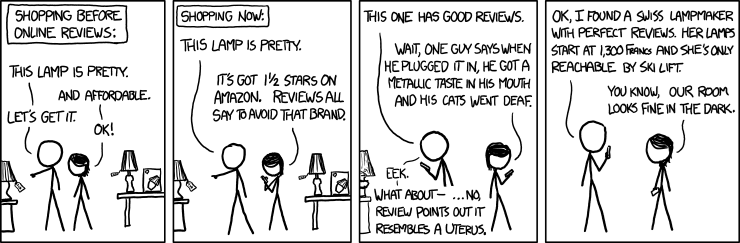

El análisis de sentimientos (también conocido como minería de opinión) intenta identificar y extraer sentimientos  dentro de un texto determinado en blogs, reseñas, redes sociales, foros, noticias, etc.

Los modelos de análisis de sentimientos detectan la polaridad dentro de un texto (por ejemplo, una opinión positiva o negativa), ya sea un texto completo, un párrafo, una oración o una cláusula. Comprender los sentimientos de las personas es esencial para las empresas, ya que los clientes pueden expresar abiertamente sus pensamientos y sentimientos.

Tradicionalmente detección con léxicos o modelos supervisados. (algunos léxicos ya vienen integrados en NLTK)
* VADER lexicon (incluye emojis, dice que fue creado especialmente para social media)
* SentiWordNet (basado en WordNet, asigna un valor de polaridad negativa y postiva a cada synset).
* TextBlob lexicon (también asociado a WordNet).
* AFFIN lexicon (incluye emoticons).

Una de las desventajas del uso de léxicos es que las personas pueden expresan sus emociones de diferentes maneras. Por ejemplo, algunas palabras que típicamente expresan enojo, como “bad” or “kill”, también pueden expresar felicidad.

### Detección de emociones

Tiene como objetivo detectar emociones, como la felicidad, la frustración, la ira, la tristeza, etc. Se suele decir que puede ser la causa de los sentimientos.

También hay léxicos específicos para esta tarea:
* EmoLex (comprende varios léxicos creados tanto manualmente como de forma automática, hashtags). Para cada término le asignan un sentimiento, y dentro de ese sentimiento el nivel de la emoción.
* SentiSense. Asocia sentimiento y emoción a synsets de WordNet y está también disponible en Español.


No todas las bibliotecas lo traen implementado. De todas formas, lo más conveniente sería encontrar un dataset etiquetado y usarlo para entrenar un modelo propio.

#### NLTK

Trae incorporados algunos lexicons para la detección de sentimiento. Vamos a utilizar VADER y SentiWordNet.

##### VADER

Nos va a devolver varios scores. En primer lugar vamos a tener score positivo, negativo y neutro, los cuales representan la proporción del texto que cae en esas categorías. Entre las tres deben sumar 1. Asismismo, se obtiene un score denominado ``compound`` que representa la suma de todos los ratings de las palabras incluidas en el texto, normalizadas entre -1 (negativo extremo) hasta 1 (positivo extremo).

In [ ]:
nltk.download('vader_lexicon')

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
for sentence in text_list:
  print(sentence)
  ss = sid.polarity_scores(sentence)
  for k in sorted(ss):
    print('{0}: {1}, '.format(k, ss[k]), end='')

##### SentiWordNet

Como el nombre lo indica, depende de WordNet y necesita que se indique qué tipo de etiqueta POS tienen los términos.

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('sentiwordnet')

In [ ]:
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def penn_to_wn(tag):
    """
    Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

def get_sentiment(word,tag):
    """ returns list of pos neg and objective score. But returns empty list if not present in senti wordnet. """

    wn_tag = penn_to_wn(tag) # si no es de ninguno de estos tres tipos, no se lo analiza
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV, wn.VERB):
        return []

    lemma = lemmatizer.lemmatize(word, pos=wn_tag) # si no existe el lema, se retorna vacío
    if not lemma:
        return []

    synsets = wn.synsets(word, pos=wn_tag) # si no tiene synsets, se retorna vacío
    if not synsets:
        return []

    synset = synsets[0] # acá está desambiguando de la forma más sencilla posible. Se podrían adoptar otras estrategias
    swn_synset = swn.senti_synset(synset.name())

    return [swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

In [ ]:
ps = PorterStemmer()
words_data = ['this','movie','is','wonderful']
# words_data = [ps.stem(x) for x in words_data] # if you want to further stem the word

pos = nltk.pos_tag(words_data)
senti_val = [get_sentiment(x,y) for (x,y) in pos]

print("Etiquetas pos:",pos)
print("Sentimiento de cada una de las palabras:",senti_val)

#### textBlob

Trae un modelo pre-entrenado para la detección de sentimientos. Disponible solo para Inglés y Alemán.

In [ ]:
from textblob import TextBlob

In [ ]:
sent = TextBlob(text_short)

print(sent.sentiment)
print(sent.sentiment.polarity)

In [ ]:
sent = TextBlob("I am so in love with NLP!") 
print(sent.sentiment)
print(sent.sentiment.polarity)

sent = TextBlob("I really hate with NLP!") 
print(sent.sentiment)
print(sent.sentiment.polarity)

#### [senti-py](https://github.com/aylliote/senti-py)

Un paquete para hacer sentiment analysis sobre Español Porteño. Está contruido tomando como bajse Scikit learn y NLTK. El modelo está entrenado con reviews extraídas de sitios como: Mercado Libre, Trip Advisor, Quejas Online, Pedidos Ya, Así Hablamos y otros sitios más.

In [ ]:
pip install spanish_sentiment_analysis

In [ ]:
from classifier import *

clf = SentimentClassifier()

In [ ]:
x = "Esta muy buena esa pelicula"

print(x + ' ==> %.5f' % clf.predict(x))

In [ ]:
X = ["Son malaaaaa onda esos vecinossss", 'el BIFE estuvo EXCELENTE',
     '!!!! Quien te pensas que sos ??Ahora andate!!y no te quiero ver mas..!',
     'K askoooo']

for e in X:
    print(e + ' ==> %.5f' % clf.predict(e))
    print(e + ' ==> %.5f' % clf.predict(e.lower())) # no es sensible a mayúsculas, tampoco a los acentos

Implementa también una consideración especial con ciertas palabras que indican contraste como "pero". En esos casos, divide las oraciones en dos y luego combina los resultados.

In [ ]:
X = ['Los actores son buenos, pero no me gusto la pelicula igual',
     'Los actores son buenos',
     'no me gusto la pelicula igual',
     'pero no me gusto la pelicula igual']
for e in X:
    print(e + ' ==> %.5f' % clf.predict(e))

[pysentimiento](https://pypi.org/project/pysentimiento/)

Biblioteca basada en transformers para detección de sentimiento y emociones. Entrenada con español rioplatense.

In [ ]:
pip install pysentimiento 

In [ ]:
from pysentimiento import SentimentAnalyzer

analyzer = SentimentAnalyzer(lang="es")

In [ ]:
for e in X:
    print(e,'::', analyzer.predict(e))

In [ ]:
from pysentimiento import EmotionAnalyzer

emotion_analyzer = EmotionAnalyzer(lang="es")

In [ ]:
for e in X:
    print(e,'::', emotion_analyzer.predict(e))

#### IBM Watson

Nuevamente, otros parámetros nos permiten obtener los sentimientos y emociones. Se encuentra disponible para idioma Español.

In [ ]:
from ibm_watson.natural_language_understanding_v1 import SentimentOptions, EmotionOptions

nlu.analyze(text=text_short,
            features=Features(sentiment=SentimentOptions(),emotion=EmotionOptions())).get_result() # la respuesta va a ser un json que podemos procesar, también tiene una opción para procesarlo con entidades propias de IBM

Si quisieramos, también podríamos obtener el tono de lo escrito. Para esto, necesitamos crear otro recurso en la plataforma de IBM, esta vez el de "Tone Analyzer". 

Este servicio no se encuentra disponible para todos los idiomas. Solo para inglés y francés.

Incluye dos opciones de análisis ```tone``` (la que vamos a utilizar acá) que permite obtener el tono de un texto completo y ```tone_chat``` que está orientada a analizar el tono de conversaciones, como por ejemplo, las mantenidas por un bot y los clientes.

In [ ]:
from ibm_watson import ToneAnalyzerV3
from ibm_watson.tone_analyzer_v3 import ToneInput

authenticator = IAMAuthenticator("API-KEY")
service = ToneAnalyzerV3(
    version='2017-09-21',
    authenticator=authenticator)
service.set_service_url('https://gateway.watsonplatform.net/tone-analyzer/api')

service.tone(
            tone_input='I am very happy. Are you sure? I do not feel like it',
            content_type="text/plain", sentences=False).get_result()

In [ ]:
service.tone(
            tone_input='I am very happy. Are you sure? I do not feel like it',
            content_type="text/plain", sentences=True).get_result() # sentences define si la salida tiene que incluir el tono para cada sentencia individual además de para todo el texto.

Pueden probar para la oración con la que veníamos trabajando, pero no detecta nada.

In [ ]:
service.tone( 
        tone_input=text_short,
        content_type='text/plain',
        sentences=True).get_result()

#### Detección de personalidad

Uno de los modelos más conocidos es el Big 5.



* *Agreeableness - Amabilidad*: cálido, amable, cooperativo, comprensivo, servicial y cortés.
  * Fuerte deseo de obtener aceptación en las relaciones personales como un medio de expresión.
  * Las personas agradables se centran en "llevarse bien", no necesariamente en "salir adelante".

* *Extraversion*: hablador, sociable, apasionado, asertivo, audaz y
dominante
  * Priorizan el deseo de obtener poder e influencia dentro de una sociedad.
  * Posee una gran afectividad positiva, lo que se manifiesta como una tendencia a experimentar placer, estados de ánimo atractivos como entusiasmo, emoción y euforia.

* *Neuroticism - Neurotismo*:
  * Experimenta estados de ánimo desagradables: hostilidad, nerviosismo y molestia.
  * Más probabilidades de evaluar las situaciones cotidianas como estresantes.
  * Es menos probable que crean que pueden hacer frente a los factores estresantes que experimentan.
  * Relacionado con el locus de control (atribuir causas de eventos a sí mismos o al ambiente externo).

*  *Openness	to	Experience - Apertura a la experiencia*: 
  * Curioso, imaginativo, creativo, complejo, sofisticado
  * También llamado "curiosidad" o "intelectualidad".
  * Altos niveles de creatividad, la capacidad de generar nuevas y útiles
ideas y soluciones.
  * Las personas altamente abiertas tienen más probabilidades de migrar a actividades artísticas y campos científicos.

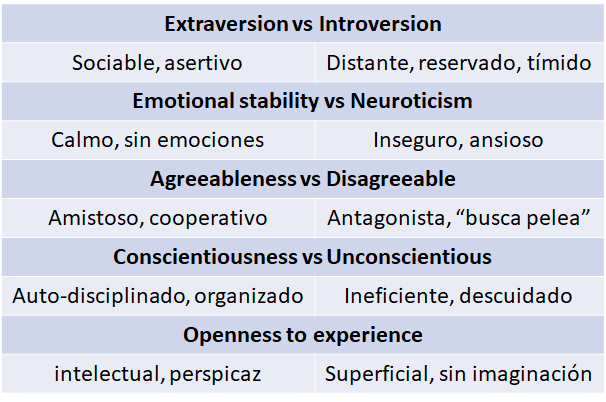

#### IBM Watson

La única que lo trae implementado. Para esto, necesitamos utilizar el servicio de "*Personality Insights*". Está disponible para Español.

In [ ]:
import json

authenticator = IAMAuthenticator('API-KEY')

service = ibm_watson.PersonalityInsightsV3(version='2017-10-13',authenticator=authenticator)

profile = service.profile(
        content=text,
        content_type='text/plain',
        content_language='en',
        accept='application/json'
        ).get_result()

print(json.dumps(profile, indent=2))

### Traducción

La traducción automática es la tarea de convertir automáticamente de un idioma natural a otro, preservando el significado del texto de entrada y produciendo texto fluido en el idioma de salida.

Por qué es difícil?
Orden de las palabras.
Acepciones de las palabras.
Pronombres.
Tiempos verbales.
Idioms.

No hay muchas bibliotecas que lo soporten de forma directa. Sin embargo, siempre es posible entrenar modelos!


#### TextBlob

Basándose en Google Translate, nos permite obtener traducciones. Tiene límite de 1000 palabras por día.

También permite hacer detección de idioma.

In [ ]:
from textblob import TextBlob
 
blob = TextBlob("Comment vas-tu?")
 
print(blob.detect_language())
 
print(blob.translate(to='es'))
print(blob.translate(to='en'))
print(blob.translate(to='zh'))

In [ ]:
blob = TextBlob(text_short)
print(blob.translate(to='es'))

#### IBM Watson

Para este caso, necesitamos crear una aplicación con el servicio "*Language Translator*".

In [ ]:
from ibm_watson import LanguageTranslatorV3

In [ ]:
authenticator = IAMAuthenticator("API-KEY")
language_translator = LanguageTranslatorV3(
    version='2018-05-01',
    authenticator=authenticator)
language_translator.set_service_url('https://gateway.watsonplatform.net/language-translator/api')

In [ ]:
translation = language_translator.translate(
    text=text_short, model_id='en-es').get_result()

print(json.dumps(translation, indent=2, ensure_ascii=False))

### Detección de Tópicos

La detección de tópicos provee modelos para organizar, comprender y resumir (extraer palabras relevantes) grandes cantidades de textos.

Son métodos para encontrar grupos de palabras (los tópicos) dentro de una colección de textos que mejor los representan.

Se basan en que cada texto se puede describir mediante una distribución de tópicos, y cada tópico puede ser descripto por una distribución de palabras.

Métodos tradicionales basados en distribuciones probabilísticas y factorización de matrices.


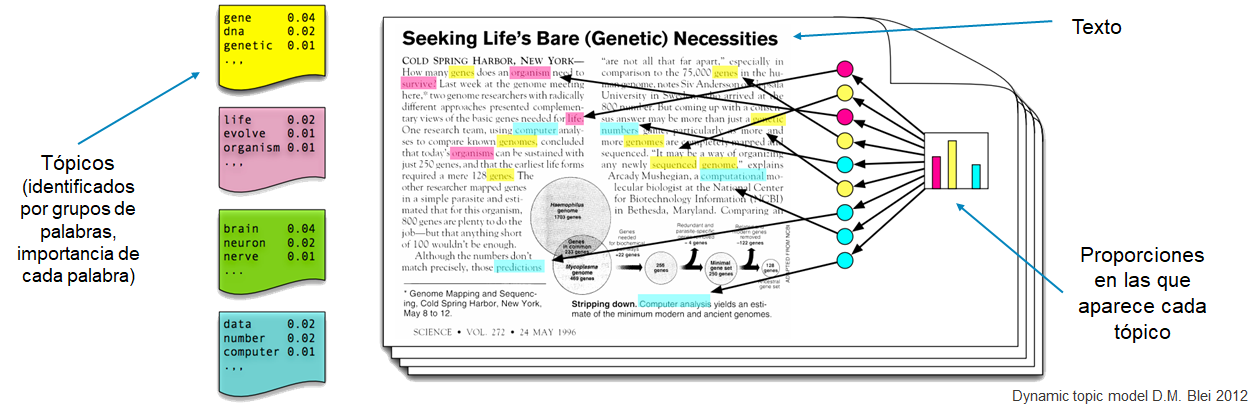

### LDA

* Método basado en distribución de probabilidades.
* No es relevante el orden de las palabras en el texto.
* El número de tópicos a encontrar debe conocerse.
* Una misma palabra puede aparecer en varios tópicos.
* Representa a los textos como una mezcla de tópicos.

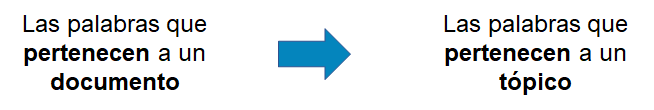

Cómo evaluar los tópicos que encontramos?
* Son interpretables?
* Son únicos/disjuntos?
* Son exhaustivos? Están todos los textos representados?

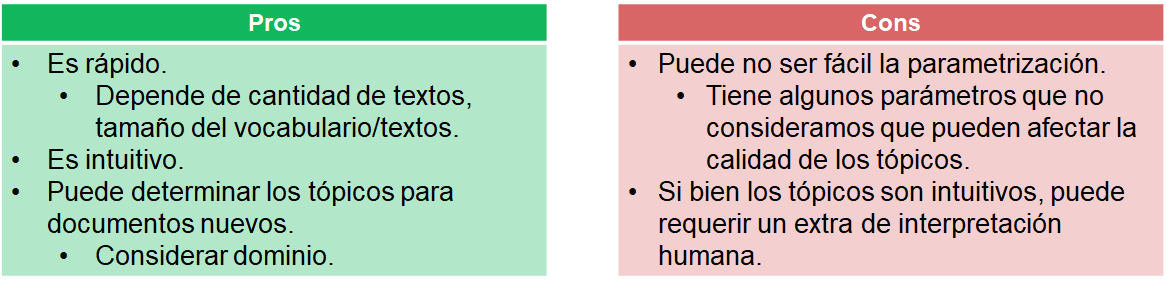

##### Gensim

Como vimos la primer clase, Gensim soporta LDA. Para poder utilizarlo, tenemos que crear el diccionario y el corpus. 

In [ ]:
import gensim
from gensim import corpora

In [ ]:
# El tokenizado depende de nosotros, en este caso estamos haciendo un tokenizado simple basado en los espacios.
texts = [[text for text in doc.split()] for doc in text_list] # acá usamos la lista de oraciones

# usamos GenSimp ara crear el diccionario con los ids únicos.
dictionary = corpora.Dictionary(texts)

print(dictionary)
print(dictionary.token2id)

Una vez construido el diccionario, podemos crear la segunda entidad necesaria para usar GenSim, el ``corpus``. Este ``corpus`` es una representación BOW del texto, es decir, una representación que contiene el id del término y la frecuencia en dicho texto.

Para este ejemplo, en lugar de hacer el split nosotros, vamos a usar el ``simple_preprocess`` de GenSim que incluye la tokenización, eliminación de acentos y se queda con los términos que tienen entre 2 y 15 caracteres.

In [ ]:
from gensim.utils import simple_preprocess

tokenized_list = [simple_preprocess(doc) for doc in text_list] 

dicti = corpora.Dictionary(tokenized_list)
corpus = [dicti.doc2bow(doc, allow_update=True) for doc in tokenized_list]
print(corpus)

In [ ]:
from gensim import models

model_lda = models.LdaModel(corpus=corpus, id2word=dicti, num_topics=4) # pueden probar que pasa si cambian la cantidad de tópicos a analizar

corpus_lda = model_lda[corpus] # aplicando el modelo al mismo corpus con el que lo creamos

# print(model_lda.get_topics())

corpus_lda = model_lda.get_document_topics(corpus)

for doc in corpus_lda:
    print(doc)

In [ ]:
from gensim.models import CoherenceModel

# Coherence measures the relative distance between words within a topic. 
# Compute Coherence Score --> Acá las definiciones: https://labs.imaginea.com/how-to-measure-topic-coherence/
coherence_model_mass = CoherenceModel(model=model_lda, corpus=corpus, dictionary=dicti, coherence='u_mass')
coherence_model_c_v = CoherenceModel(model=model_lda, texts=tokenized_list, dictionary=dicti, coherence='c_v')

print(coherence_model_mass.get_coherence()) #  a measure how often were the two words (Wi, Wj) were seen together in the corpus. Negativa por cálculo de logaritmos
print(coherence_model_c_v.get_coherence()) # This measure (CV ) combines the indirect cosine measure with the NPMI and the boolean sliding window. 

Una vez que tenemos los tópicos, podemos visualizar los tópicos dominates por documento.

In [ ]:
import pandas as pd

def format_topics_sentences(ldamodel, corpus, texts):
    sent_topics_df = pd.DataFrame()

    # topics por documentos
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # tópico dominante, contribución, keywords
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    #  agregamos el texto para mostrarlo
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=model_lda, corpus=corpus, texts=text_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Nubes de palabras de keywords por tópico:

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = model_lda.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

Ahí calculamos para un único modelo. Ahora vamos a generarnos los valores para varias cantidades de tópicos.

*Nota*. Solo estamos configurando la cantidad de tópicos, recordemos que hay más parámetros para configurar.

*Nota 2*. Por más que subamos la cantidad de iteraciones es muy probable que no converga dado que le dimos pocos textos.

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=2, iterations=50)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=tokenized_list, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

Vamos a generar nuestro modelo para diferentes cantidades de tópicos.

In [ ]:
start = 2
limit = 10
step = 1
model_list, coherence_values = compute_coherence_values(dictionary=dicti, corpus=corpus, texts=tokenized_list, start=start, limit=limit, step=step)

In [ ]:
# veamos el codo
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# imprimir la coherencia
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# seleccionar un modelo e imprimir
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

Otra opción para hacer LDA con sklearn.

In [ ]:
vectorizer = CountVectorizer(analyzer='word',       
                             lowercase=True,                   # convert all words to lowercase
                            )

data_vectorized = vectorizer.fit_transform(text_list)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=20,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

In [ ]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
# perplexity puede no ser la mejor, dado que no considera el contexto ni la semántica de las palabras
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
print(lda_model.get_params())

### Latent Semantic Analysis (LSA)

* La idea es representar los textos en una menor dimensión, obtenidas mediante la factorización de matrices.
* Se basa en la idea de que las palabras aparecerán en textos que muestran algún rasgo de semejanza, si tienen un significado parecido.
* Requiere definir el número K de tópicos (dimension de la matriz).


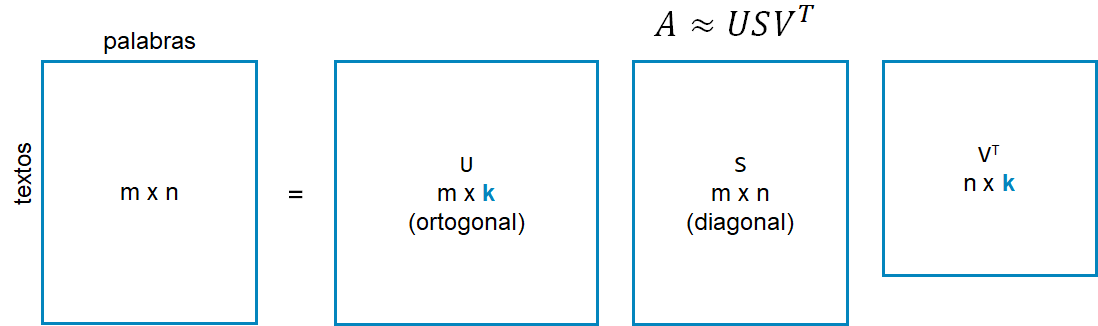

* Puede no ser fácil elegir K.
* Las representaciones no son intuitivas como en LDA.
  * No sabemos cuáles son los tópicos.
  * Los valores en los vectores son arbitrarios.
* Se requirere de una gran cantidad de textos.
* Una representación no del todo eficiente.
* No tán rápido como LDA.
* Puede no capturar completamente las relaciones de sinonimia.


##### Sklearn

Mediante la transformación SVD truncada permite obtener la representación LSA.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from sklearn.pipeline import Pipeline

vectorizer = TfidfVectorizer(stop_words='english', 
                             use_idf=True, 
                             smooth_idf=True)

svd_model = TruncatedSVD(n_components=10,       
                         algorithm='randomized',
                         n_iter=10)

#Pipe tf-idf and SVD, apply on our input documents
svd_transformer = Pipeline([('tfidf', vectorizer), ('svd', svd_model)])

svd_matrix = svd_transformer.fit_transform(text_list)

print(svd_matrix)

Además de usar gensim y hacer algunas de las cosas manualmente, hay otras bibliotecas que permiten "automatizar" un poco el proceso. Por ejemplo [``pycaret``](https://pycaret.org/).

*Nota*. Tiene varias dependencias, las cuales pueden generar conflictos. Por ejemplo. ``spacy`` y ``pyLDAvis``. La segunda es la que permite hacer un gráfico interactivo de las distribuciones de los tópicos.

In [ ]:
pip install pycaret

In [ ]:
pip install pyldavis==3.0.0

In [ ]:
from pycaret.utils import enable_colab
enable_colab() # esto es para poder hacer visualizaciones interactivas

In [ ]:
import spacy # por si reiniciamos el runtime
spacy.cli.download('en_core_web_sm')

In [ ]:
from pycaret.nlp import *

text_list = ["London is the capital and largest city of England and of the United Kingdom.",
             "Standing on the River Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to the North Sea, London has been a major settlement for two millennia",
            "Londinium was founded by the Romans.",
        "The City of London, London's ancient core − an area of just 1.12 square miles (2.9 km2) and colloquially known as the Square Mile − retains boundaries that closely follow its medieval limits.",
        "The City of Westminster is also an Inner London borough holding city status. Greater London is governed by the Mayor of London and the London Assembly.",
        "London is considered to be one of the world's most important global cities and has been termed the world's most powerful, most desirable, most influential, most visited, most expensive, innovative, sustainable, most investment friendly, and most popular for work city.",
        "London exerts a considerable impact upon the arts, commerce, education, entertainment, fashion, finance, healthcare, media, professional services, research and development, tourism and transportation. London ranks 26th out of 300 major cities for economic performance. It is one of the largest financial centres and has either the fifth or the sixth largest metropolitan area GDP.",
        "It is the most-visited city as measured by international arrivals and has the busiest city airport system as measured by passenger traffic.",
        "It is the leading investment destination, hosting more international retailers and ultra high-net-worth individuals than any other city.",
        "London's universities form the largest concentration of higher education institutes in Europe, and London is home to highly ranked institutions such as Imperial College London in natural and applied sciences, the London School of Economics in social sciences, and the comprehensive University College London and King's College London.",
        "In 2012, London became the first city to have hosted three modern Summer Olympic Games."]

nlp = setup(data = text_list) # hay más opciones de configuración. Se le puede pasar un df, se pueden setear stopwords, etc...

Ahora, hay setear el modelo a utilizar. ``Pycaret`` soporta varios métodos:

* ``lda``: Latent Dirichlet Allocation.
* ``lsi``. Latent Semantic Indexing.
* ``hdp``. Hierarchical Dirichlet Process.
* ``rp``. Random Projections.
* ``nmf``. Non-Negative Matrix Factorization.

In [ ]:
lda = create_model('lda', num_topics = 6, multi_core = True)

df_lda = assign_model(lda)
df_lda

Lo "lindo" de ``pycaret`` es que permite hacer gráficos con solo invocar un método. Por ejemplo:

* ``plot_model(lda, plot='topic_distribution')``
* ``plot_model(lda, plot='topic_model')`` --> Este es el "problemático" con las dependencias.
* ``plot_model(lda, plot='wordcloud', topic_num = 'Topic 5')``
* ``plot_model(lda, plot='frequency', topic_num = 'Topic 5')``
* ``plot_model(lda, plot='bigram', topic_num = 'Topic 5')``
* ``plot_model(lda, plot='trigram', topic_num = 'Topic 5')``
* ``plot_model(lda, plot='distribution', topic_num = 'Topic 5')``
* ``plot_model(lda, plot='sentiment', topic_num = 'Topic 5')``
* ``plot_model(lda, plot='tsne')``

In [ ]:
plot_model(lda, plot='topic_distribution')

In [ ]:
plot_model(lda, plot='topic_model')

Finalmente, también podemos hacer algunas visualizaciones comparativas de los tópicos que encontramos.

In [ ]:
evaluate_model(lda)